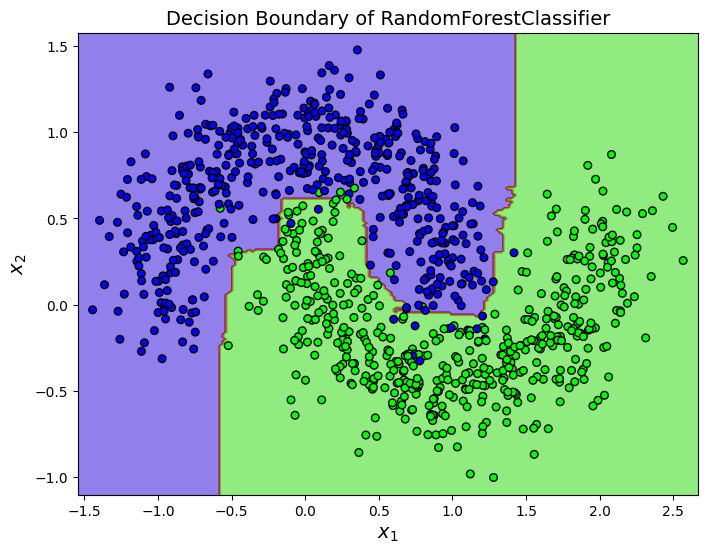

In [1]:
# We are going to use a RandomForestClassifier, which is an ensemble classifier
# based on the bagging method, specifically optimized for DecisionTree models

from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate a synthetic nonlinear dataset using the make_moons function
X, y = make_moons(n_samples=1000, noise=0.20, random_state=42)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create a RandomForestClassifier with 500 trees and a maximum of 16 leaf nodes per tree
# n_jobs=-1 allows the training to use all available CPU cores
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

# Train the random forest model on the training set
rnd_clf.fit(X_train, y_train)

# Function to plot the decision boundary for a given classifier
def plot_decision_boundary(clf, X, y, alpha=0.5):
    x1s = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 200)
    x2s = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=alpha, cmap=plt.cm.brg)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.brg)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14)

# Plot the decision boundary of the trained RandomForestClassifier
plt.figure(figsize=(8, 6))
plot_decision_boundary(rnd_clf, X, y)
plt.title("Decision Boundary of RandomForestClassifier", fontsize=14)
plt.show()